class
1    200
2    200
dtype: int64


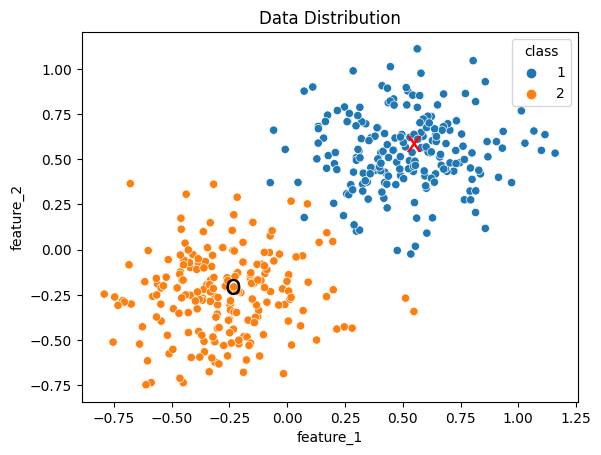

Class 1
-> Center of distribution: [0.51123029 0.54234868]
-> Variance (Feat 1, Feat 2): [0.05387923 0.04355032]


Class 2
-> Center of distribution: [-0.2711956  -0.24839847]
-> Variance (Feat 1, Feat 2): [0.05278857 0.05036512]
Input feature vectors for training:
[[ 0.28519329  0.98841109]
 [ 0.61794593  0.53505251]
 [-0.73238755 -0.30882033]
 [-0.38071899 -0.27568733]
 [ 0.41838509  0.28361709]]


Target class for training:
[1 1 2 2 1]
Weight matrix:
[[ 0.34812614  0.65187386]
 [ 0.48913822 -0.48913822]
 [ 0.58646245 -0.58646245]]


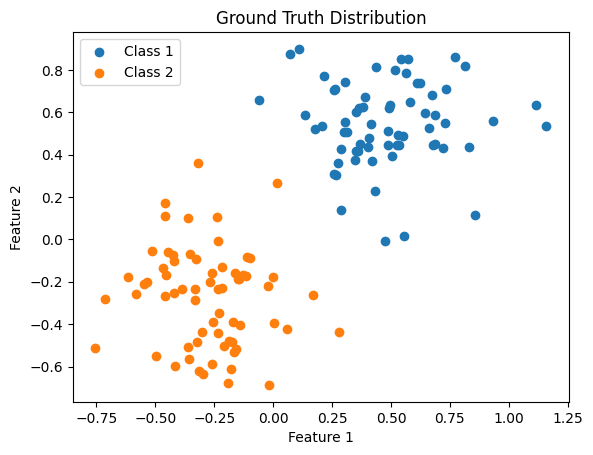

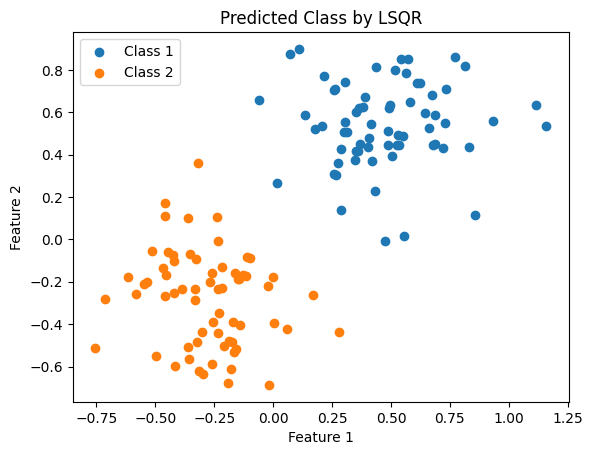

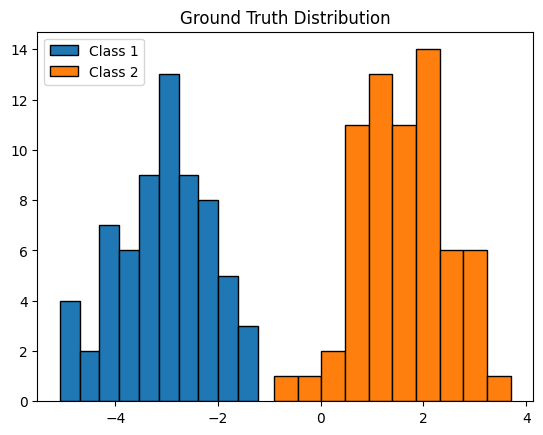

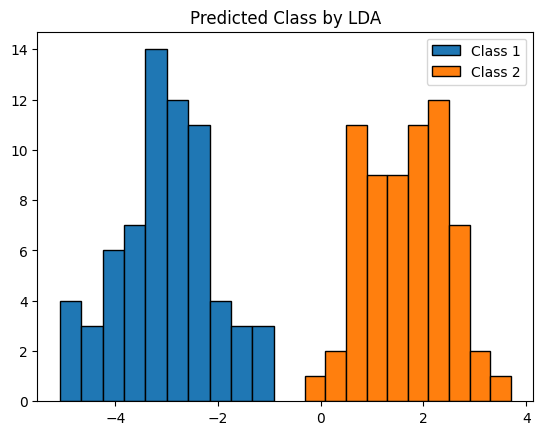

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

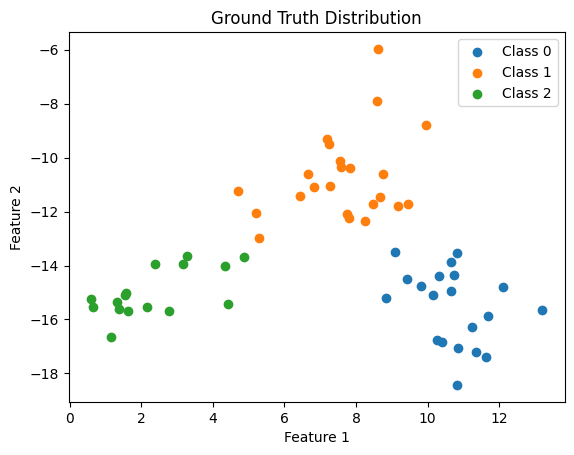

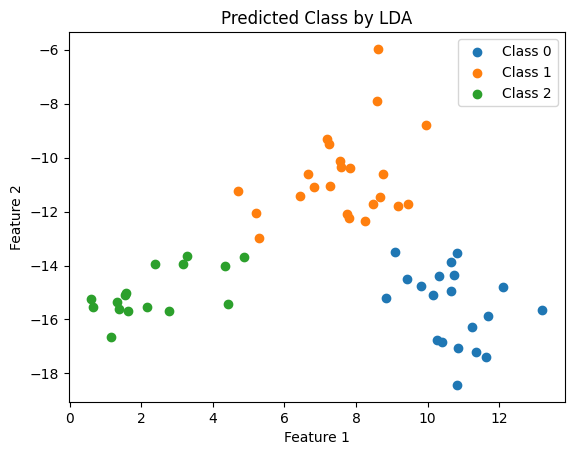

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

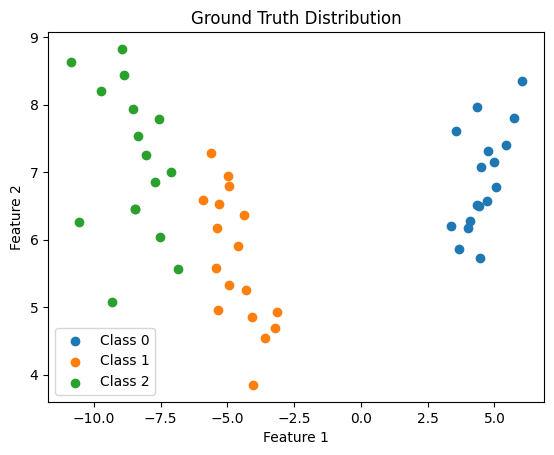

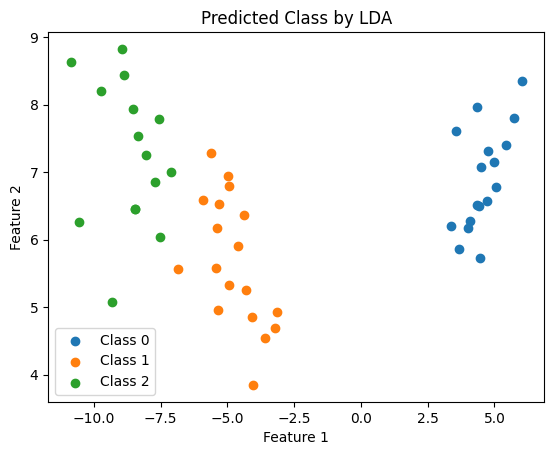

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

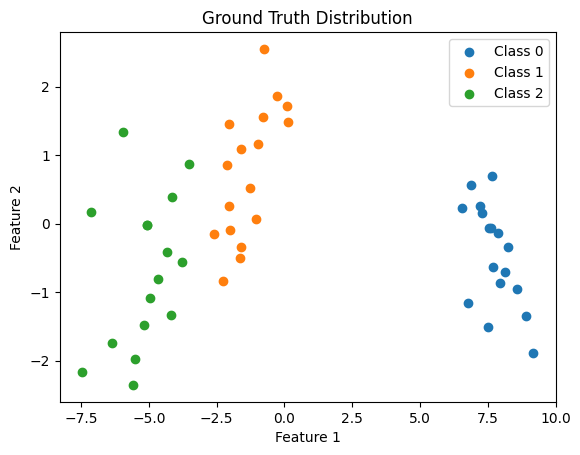

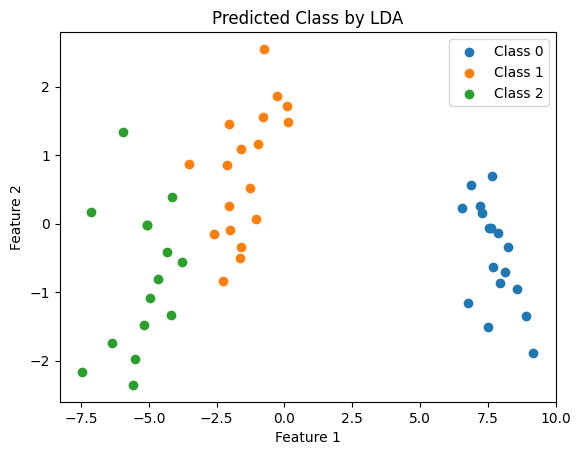

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv('https://drive.google.com/uc?id=12WNlk5OsNrlm6V0F2uqdYnXqV1alS61U')
print(df.groupby("class").size())
df.head()

plt.text(df[df['class'] == 1]['feature_1'].mean(), df[df['class'] == 1]['feature_2'].mean(), color='red', s='x', size=20) 
plt.text(df[df['class'] == 2]['feature_1'].mean(), df[df['class'] == 2]['feature_2'].mean(), color='black', s='o', size=20)

sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='class', palette='tab10') 
plt.title("Data Distribution")
plt.show()

print("Class 1")
print("-> Center of distribution: %s" % df[df['class'] == 1][['feature_1', 'feature_2']].mean().values)
print("-> Variance (Feat 1, Feat 2): %s" % df[df['class'] == 1][['feature_1', 'feature_2']].var().values)
print("\n")
print("Class 2")
print("-> Center of distribution: %s" % df[df['class'] == 2][['feature_1', 'feature_2']].mean().values) 
print("-> Variance (Feat 1, Feat 2): %s" % df[df['class'] == 2][['feature_1', 'feature_2']].var().values)

X = df[['feature_1', 'feature_2']].values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2023, stratify=y)

one_hot_enc = OneHotEncoder(handle_unknown='ignore')
#OneHotEncoder
y_train_one_hot = one_hot_enc.fit_transform(y_train.reshape(-1, 1)).toarray()
print('Input feature vectors for training:')
print(X_train[:5])
print('\n')
print('Target class for training:')
print(y_train[:5])

X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_train_aug_inv = np.linalg.inv(np.dot(X_train_aug.T, X_train_aug))
w = np.dot(X_train_aug_inv, np.dot(X_train_aug.T, y_train_one_hot)) 
print('Weight matrix:')
print(w)

X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test]) 
lsc_prediction = np.argmax(np.dot(X_test_aug, w), axis=1) + 1
def plot_distribution(X_test, prediction, title):
    classes = np.unique(prediction)
    for c in classes:
        plt.scatter(X_test[prediction == c][:, 0], X_test[prediction == c][:, 1], label=f'Class {c}')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
def plot_hist(X_test_transformed, prediction, title):
    classes = np.unique(prediction)
    for c in classes:
        plt.hist(X_test_transformed[prediction == c], bins=10, edgecolor='black', label=f'Class {c}')
    plt.title(title)
    plt.legend()
    plt.show()  

plot_distribution(X_test, y_test, 'Ground Truth Distribution')
plot_distribution(X_test, lsc_prediction, 'Predicted Class by LSQR')

clf = LinearDiscriminantAnalysis(solver='eigen') 
clf.fit(X_train, y_train)
X_test_tranformed = clf.transform(X_test).reshape(-1) 
lda_prediction = clf.predict(X_test)

plot_hist(X_test_tranformed, y_test, 'Ground Truth Distribution')
plot_hist(X_test_tranformed, lda_prediction, 'Predicted Class by LDA')

from sklearn.datasets import load_wine
wine_dataset = load_wine(as_frame=True)
display(wine_dataset['data'][:5])
display(wine_dataset['target'][:5])

X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'][:].values, wine_dataset['target'], test_size=0.33,
random_state=2023, stratify=wine_dataset['target'])


clf = LinearDiscriminantAnalysis(solver='eigen', n_components=2)
clf.fit(X_train, y_train) 
X_test_transformed = clf.transform(X_test)
lda_prediction = clf.predict(X_test)
plot_distribution(X_test_transformed, y_test, 'Ground Truth Distribution')
plot_distribution(X_test_transformed, lda_prediction, 'Predicted Class by LDA')

#Exercise11
from sklearn.datasets import load_iris
iris_dataset = load_iris(as_frame=True)
display(iris_dataset['data'][:5])
display(iris_dataset['target'][:5])
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'][:].values, iris_dataset['target'], test_size=0.33,
random_state=2023, stratify=iris_dataset['target'])

clf = LinearDiscriminantAnalysis(solver='eigen', n_components=2)
clf.fit(X_train, y_train) 
X_test_transformed = clf.transform(X_test)
lda_prediction = clf.predict(X_test)
plot_distribution(X_test_transformed, y_test, 'Ground Truth Distribution')
plot_distribution(X_test_transformed, lda_prediction, 'Predicted Class by LDA')

#Additional Resources LinearDiscriminantAnalysis 
from sklearn.datasets import load_iris
iris_dataset = load_iris(as_frame=True)
display(iris_dataset['data'][:5])
display(iris_dataset['target'][:5])
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'][:].values, iris_dataset['target'], test_size=0.33,
random_state=2023, stratify=iris_dataset['target'])

clf = LinearDiscriminantAnalysis(solver='svd', n_components=2)
clf.fit(X_train, y_train) 
X_test_transformed = clf.transform(X_test)
lda_prediction = clf.predict(X_test)
plot_distribution(X_test_transformed, y_test, 'Ground Truth Distribution')
plot_distribution(X_test_transformed, lda_prediction, 'Predicted Class by LDA')